# nextclade

In [1]:
!nextclade --help

nextclade 2.14.0
Viral genome alignment, mutation calling, clade assignment, quality checks and phylogenetic
placement.

Nextclade is a part of Nextstrain: https://nextstrain.org

Documentation: https://docs.nextstrain.org/projects/nextclade
Nextclade Web: https://clades.nextstrain.org
Publication:   https://doi.org/10.21105/joss.03773

For short help type: `nextclade -h`, for extended help type: `nextclade --help`. Each subcommand has
its own help, for example: `nextclade run --help`.

USAGE:
    nextclade [OPTIONS] <SUBCOMMAND>

OPTIONS:
    -h, --help
            Print help information

    -V, --version
            Print version information

  Verbosity:
        --verbosity <VERBOSITY>
            Set verbosity level of console output [default: warn]
            
            [possible values: off, error, warn, info, debug, trace]

        --silent
            Disable all console output. Same as `--verbosity=off`

    -v, --verbose
            Make console output more verbose. Add m

In [2]:
!nextclade run --help

nextclade-run 
Run alignment, mutation calling, clade assignment, quality checks and phylogenetic placement

For short help type: `nextclade -h`, for extended help type: `nextclade --help`. Each subcommand has
its own help, for example: `nextclade run --help`.

USAGE:
    nextclade run [OPTIONS] [--] [INPUT_FASTAS]...

OPTIONS:
    -h, --help
            Print help information

  Inputs:
    -D, --input-dataset <INPUT_DATASET>
            Path to a directory or a zip file containing a dataset.
            
            See `nextclade dataset --help` on how to obtain datasets.
            
            If this flag is not provided, the following individual input flags are required:
            `--input-root-seq`, `--input-tree`, `--input-qc-config`, and the following individual
            input files are recommended: `--input-gene-map`, `--input-pcr-primers`.
            
            If both the `--input-dataset` and individual `--input-*` flags are provided, each
            individual 

In [ ]:
!nextclade run \
   --input-dataset data \# 数据集所在的路径
   --output-all=output/ \# 输出的路径
   data/28seq_sequences.fasta# 分析的数据

In [17]:
!nextclade run \
   --input-datasedata/sars-cov-2 \
   --output-all=output/ \
   data/sars-cov-2/28seq_sequences.fasta

输出了多个文件，包括
- nextclade.aligned.fasta 对齐的输入序列
- nextclade_gene_ORF6.translation.fasta nextclade_gene_ORF7a.translation.fasta nextclade_gene_ORF7b.translation.fasta nextclade_gene_ORF8.translation.fasta nextclade_gene_E.translation.fasta      nextclade_gene_ORF9b.translation.fasta nextclade_gene_M.translation.fasta nextclade_gene_S.translation.fasta nextclade_gene_N.translation.fasta nextclade_gene_ORF1a.translation.fasta nextclade_gene_ORF1b.translation.fasta nextclade_gene_ORF3a.translation.fasta 对应于每个基因的对齐肽
- nextclade.insertions.csv 针对每个输入序列的剥离插入列表list of stripped insertions
- nextclade.tsv nextclade.csv TSV、CSV格式的分析结果
- nextclade.json nextclade.ndjson JSON格式的详细分析结果
- nextclade.auspice.json 与输入树相同，但输入序列放置在其上
- nextclade.errors.csv 错误、警告和失败基因列表

# iqtree

In [3]:
!iqtree -s output/nextclade.aligned.fasta

IQ-TREE multicore version 2.0.3 for Linux 64-bit built Dec 20 2020
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    nuc-NUC12WSKi5 (AVX2, FMA3, 30 GB RAM)
Command: iqtree -s output/nextclade.aligned.fasta
Seed:    468661 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Aug  9 11:45:42 2023
Kernel:  AVX+FMA - 1 threads (16 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 16 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file output/nextclade.aligned.fasta ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 28 sequences with 29903 columns, 594 distinct patterns
118 parsimony-informative, 321 singleton sites, 29464 constant sites
                                      Gap/Ambiguity  Composition  p-value
   1  Iceland/1173/2020                       0.25%    pa

Generating 98 parsimony trees... 0.081 second
Computing log-likelihood of 98 initial trees ... 0.066 seconds
Current best score: -45136.836

Do NNI search on 20 best initial trees
Estimate model parameters (epsilon = 0.100)
BETTER TREE FOUND at iteration 1: -45134.883
Estimate model parameters (epsilon = 0.100)
UPDATE BEST LOG-LIKELIHOOD: -45134.855
Iteration 10 / LogL: -45135.123 / Time: 0h:0m:0s
Iteration 20 / LogL: -45134.855 / Time: 0h:0m:0s
Finish initializing candidate tree set (11)
Current best tree score: -45134.855 / CPU time: 0.297
Number of iterations: 20
--------------------------------------------------------------------
|               OPTIMIZING CANDIDATE TREE SET                      |
--------------------------------------------------------------------
Iteration 30 / LogL: -45137.008 / Time: 0h:0m:0s (0h:0m:1s left)
Iteration 40 / LogL: -45135.059 / Time: 0h:0m:0s (0h:0m:0s left)
Iteration 50 / LogL: -45134.985 / Time: 0h:0m:0s (0h:0m:0s left)
Iteration 60 / LogL: -451

# ggtree

In [1]:
library('ggtree')

ggtree v3.6.2 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

LG Wang, TTY Lam, S Xu, Z Dai, L Zhou, T Feng, P Guo, CW Dunn, BR
Jones, T Bradley, H Zhu, Y Guan, Y Jiang, G Yu. treeio: an R package
for phylogenetic tree input and output with richly annotated and
associated data. Molecular Biology and Evolution. 2020, 37(2):599-603.
doi: 10.1093/molbev/msz240

G Yu. Data Integration, Manipulation and Visualization of Phylogenetic
Trees (1st ed.). Chapman and Hall/CRC. 2022. ISBN: 9781032233574 



In [2]:
tree <- read.tree('output/nextclade.aligned.fasta.treefile')
tree


Phylogenetic tree with 28 tips and 26 internal nodes.

Tip labels:
  Iceland/1173/2020, England/MILK-1567218/2021, England/CAMC-1395ED3/2021, NZL/20CV0589/2020, GHA/1651_S3/2020, USA/MD-CDC-ASC210277356/2021, ...

Unrooted; includes branch lengths.

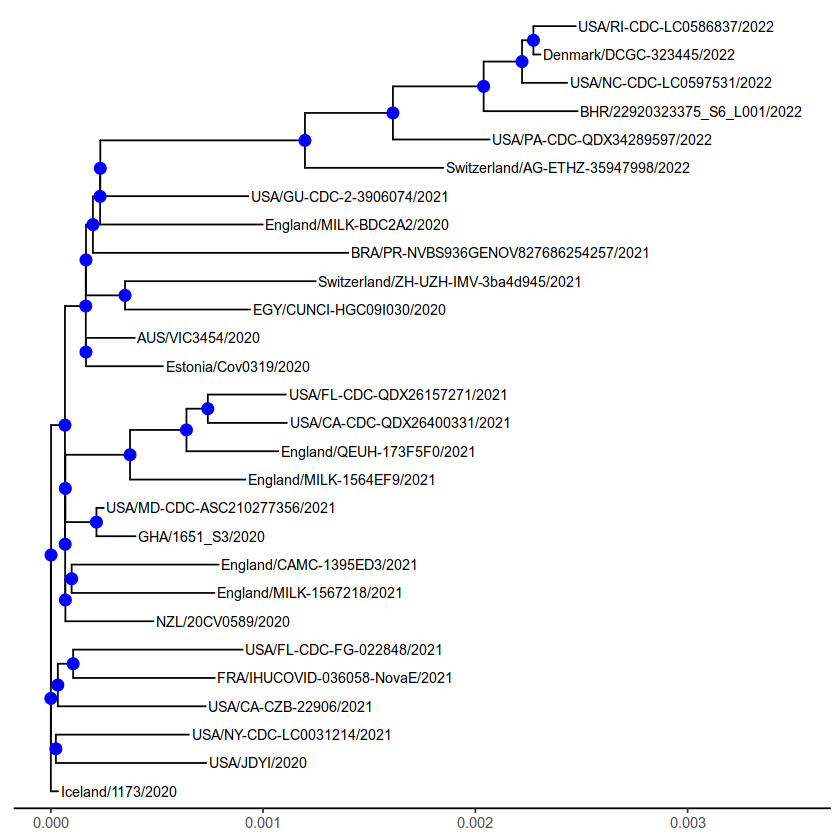

In [3]:
ggtree(tree) + geom_tiplab(aes(label = label), size = 3) +
geom_nodepoint(size = 3, color = "blue") + theme_tree2() + xlim(NA, 0.0035)